# Tutorial Pandas aplicado a datos de COVID-19

Pequeño tutorial muy básico sobre Pandas DataFrames, como cargar datos de un fichero CSV, algunas manipulaciones básicas y representación de los datos en forma de gráficas.

In [328]:
# Importar pandas y cualquier otra librería necesaria
import pandas as pd
import numpy as np
from scipy import interpolate
# Permite visualizar plots de matplotlib en el notebook
%matplotlib inline 

## Carga datos en DataFrames desde CSV
Este turorial se basa en algunos de los datos publicados en GitHub para la elaboración del [Coronavirus COVID-19 Global Cases by the Center for Systems Science and Engineering (CSSE)](https://coronavirus.jhu.edu/map.html) de la Universidad Johns Hopkins en USA.
Los datos están disponibles en [GitHub](https://urldefense.proofpoint.com/v2/url?u=https-3A__github.com_CSSEGISandData_2019-2DnCoV&d=DwMFaQ&c=n6-cguzQvX_tUIrZOS_4Og&r=ZNGvwmzlj8kMBY6JiOVCuA&m=I4tRzMk97krELxTlEBHo8DfBIHceLgA3njBSxpFaSkY&s=UBc1VDxKy4sUqMpr8gzpszg8V_iQ8FbOR-2YTsMe81E&e=).

Si los archivos en CSV dejaran de estar disponibles en repositorio de GitHub anterior, se incluyen algunos ficheros de ejemplo en este mismo repositorio.

In [312]:
global_confirmed_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
global_deaths_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
global_recovered_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# Descomente las siguientes líneas si hay problemas al cargar los datos del GitHub original en la siguiente celda 
#global_confirmed_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_confirmed_global.csv'
#global_deaths_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_deaths_global.csv'
#global_recovered_url = 'https://github.com/mercaderd/python-notebooks/raw/master/covid_data_csv/time_series_covid19_recovered_global.csv'

In [373]:
# Conversion necessaria para sustituir algunos valores en blanco de la comumna Province/State 
f = lambda x : 'Country' if x is '' else x 

# Carga de datos en 3 DataFrames distintos
global_confirmed  = pd.read_csv(global_confirmed_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                parse_dates = True,
                                converters = {'Province/State' : f})
global_deaths  = pd.read_csv(global_deaths_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                parse_dates = True,
                                converters = {'Province/State' : f})
global_recovered  = pd.read_csv(global_recovered_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                parse_dates = True,
                                converters = {'Province/State' : f})

In [374]:
# Se desechan algunas columnas innecesarias, se traspone el Dataframe (cambiar filas por columnas) 
# y se convierte el índice a formato datetime. Para los tres Dataframes cargados.
global_confirmed = global_confirmed.drop(columns=['Lat','Long']).T
global_confirmed.index = pd.to_datetime(global_confirmed.index)

global_deaths = global_deaths.drop(columns=['Lat','Long']).T
global_deaths.index = pd.to_datetime(global_deaths.index)

global_recovered = global_recovered.drop(columns=['Lat','Long']).T
global_recovered.index = pd.to_datetime(global_recovered.index)

Se puede visualizar uno de los Dataframes para comprobar cómo están organizados los datos. Para cada uno de los Dataframes los datos de cada país corresponden a una columna, y los datos por fechas se corresponden con las filas:

In [375]:
global_confirmed

Province/State     Country                                                     \
Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
2020-01-22               0       0       0       0      0                   0   
2020-01-23               0       0       0       0      0                   0   
2020-01-24               0       0       0       0      0                   0   
2020-01-25               0       0       0       0      0                   0   
2020-01-26               0       0       0       0      0                   0   
2020-01-27               0       0       0       0      0                   0   
2020-01-28               0       0       0       0      0                   0   
2020-01-29               0       0       0       0      0                   0   
2020-01-30               0       0       0       0      0                   0   
2020-01-31               0       0       0       0      0                   0   
2020-02-01               0       0       0       0      0                   0   
2020-02-02               0       0       0       0      0                   0   
2020-02-03               0       0       0       0      0                   0   
2020-02-04               0       0       0       0      0                   0   
2020-02-05               0       0       0       0      0                   0   
2020-02-06               0       0       0       0      0                   0   
2020-02-07               0       0       0       0      0                   0   
2020-02-08               0       0       0       0      0                   0   
2020-02-09               0       0       0       0      0                   0   
2020-02-10               0       0       0       0      0                   0   
2020-02-11               0       0       0       0      0                   0   
2020-02-12               0       0       0       0      0                   0   
2020-02-13               0       0       0       0      0                   0   
2020-02-14               0       0       0       0      0                   0   
2020-02-15               0       0       0       0      0                   0   
2020-02-16               0       0       0       0      0                   0   
2020-02-17               0       0       0       0      0                   0   
2020-02-18               0       0       0       0      0                   0   
2020-02-19               0       0       0       0      0                   0   
2020-02-20               0       0       0       0      0                   0   
...                    ...     ...     ...     ...    ...                 ...   
2020-03-08               4       0      19       1      0                   0   
2020-03-09               4       2      20       1      0                   0   
2020-03-10               5      10      20       1      0                   0   
2020-03-11               7      12      20       1      0                   0   
2020-03-12               7      23      24       1      0                   0   
2020-03-13               7      33      26       1      0                   1   
2020-03-14              11      38      37       1      0                   1   
2020-03-15              16      42      48       1      0                   1   
2020-03-16              21      51      54       2      0                   1   
2020-03-17              22      55      60      39      0                   1   
2020-03-18              22      59      74      39      0                   1   
2020-03-19              22      64      87      53      0                   1   
2020-03-20              24      70      90      75      1                   1   
2020-03-21              24      76     139      88      2                   1   
2020-03-22              40      89     201     113      2                   1   
2020-03-23              40     104     230     133      3                   3   
2020-03-24              74     

In [376]:
global_confirmed['Country'][['France','Spain']]

Country/Region,France,Spain
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,2,0
2020-01-25,3,0
2020-01-26,3,0
2020-01-27,3,0
2020-01-28,4,0
2020-01-29,5,0
2020-01-30,5,0
2020-01-31,5,0


# Cargar datos con coordenadas GPS

Se cargan en otros Dataframes los datos a modo de cabecera, con las regiones y coordenadas GPS consideradas para todos los paises.

In [377]:
global_confirmed_GPS = pd.read_csv(global_confirmed_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                usecols = [0,1,2,3],
                                converters = {'Province/State' : f}).T
global_deaths_GPS = pd.read_csv(global_deaths_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                usecols = [0,1,2,3],
                                converters = {'Province/State' : f}).T
global_recovered_GPS = pd.read_csv(global_recovered_url,
                                sep = ',',
                                header = 0,
                                index_col = [0,1],
                                usecols = [0,1,2,3],
                                converters = {'Province/State' : f}).T

Estos headers se pueden utilizar a modo de directorio de posiciones. Podemos saber a qué pais corresponde una columna concreta, por ejemplo la 4:

In [378]:
global_confirmed_GPS

Province/State     Country                                      \
Country/Region Afghanistan  Albania  Algeria  Andorra   Angola   
Lat                   33.0  41.1533  28.0339  42.5063 -11.2027   
Long                  65.0  20.1683   1.6596   1.5218  17.8739   

Province/State                                         \
Country/Region Antigua and Barbuda Argentina  Armenia   
Lat                        17.0608  -38.4161  40.0691   
Long                      -61.7964  -63.6167  45.0382   

Province/State Australian Capital Territory New South Wales  \
Country/Region                    Australia       Australia   
Lat                                -35.4735        -33.8688   
Long                               149.0124        151.2093   

Province/State          ...           Country                        \
Country/Region          ...          Botswana  Burundi Sierra Leone   
Lat                     ...          -22.3285  -3.3731     8.460555   
Long                    ...           24.6849  29.9189   -11.779889   

Province/State Bonaire, Sint Eustatius and Saba    Country  \
Country/Region                      Netherlands     Malawi   
Lat                                     12.1784 -13.254308   
Long                                   -68.2385  34.301525   

Province/State Falkland Islands (Islas Malvinas) Saint Pierre and Miquelon  \
Country/Region                    United Kingdom                    France   
Lat                                     -51.7963                   46.8852   
Long                                    -59.5236                  -56.3159   

Province/State     Country                                       
Country/Region South Sudan Western Sahara Sao Tome and Principe  
Lat                  6.877        24.2155              0.186360  
Long                31.307       -12.8858              6.613081  

[2 rows x 263 columns]

Extraer los datos de un pais:

In [379]:
global_confirmed['Country']['Germany']

2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
2020-01-27         1
2020-01-28         4
2020-01-29         4
2020-01-30         4
2020-01-31         5
2020-02-01         8
2020-02-02        10
2020-02-03        12
2020-02-04        12
2020-02-05        12
2020-02-06        12
2020-02-07        13
2020-02-08        13
2020-02-09        14
2020-02-10        14
2020-02-11        16
2020-02-12        16
2020-02-13        16
2020-02-14        16
2020-02-15        16
2020-02-16        16
2020-02-17        16
2020-02-18        16
2020-02-19        16
2020-02-20        16
               ...  
2020-03-08      1040
2020-03-09      1176
2020-03-10      1457
2020-03-11      1908
2020-03-12      2078
2020-03-13      3675
2020-03-14      4585
2020-03-15      5795
2020-03-16      7272
2020-03-17      9257
2020-03-18     12327
2020-03-19     15320
2020-03-20     19848
2020-03-21     22213
2020-03-22     24873
2020-03-23     29056
2020-03-24   

In [380]:
global_confirmed['Country'][['Spain', 'Germany']]

Country/Region,Spain,Germany
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
2020-01-27,0,1
2020-01-28,0,4
2020-01-29,0,4
2020-01-30,0,4
2020-01-31,0,5


Saber las provincias/stados o regiones consideradas para un pais:

In [381]:
global_confirmed.xs('France',axis=1,level = 1).columns

Index(['French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Country', 'Saint Pierre and Miquelon'],
      dtype='object', name='Province/State')

Extraer los datos de una región de un pais:

In [382]:
global_confirmed.tail()['Australian Capital Territory']['Australia']

2020-04-02    87
2020-04-03    91
2020-04-04    93
2020-04-05    96
2020-04-06    96
Name: Australia, dtype: int64

## Representando gráficamente los datos

La mejor forma para entender los datos es representarlos gráficamente.

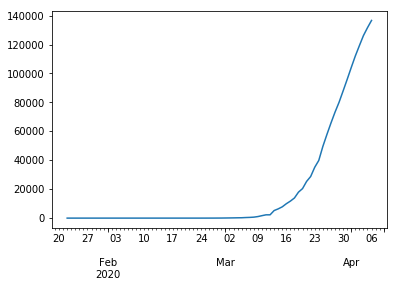

In [383]:
# Curva de evolución de contagiados en España
global_confirmed['Country']['Spain'].plot()

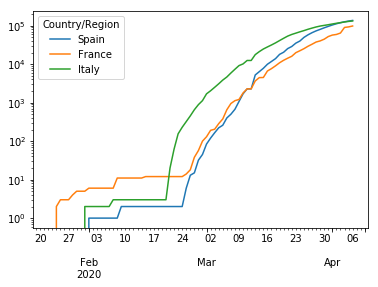

In [384]:
# Curva de contagiados en España, Francia
# Escala logarítimica en eje y
global_confirmed['Country'][['Spain','France', 'Italy']].plot(logy=True)

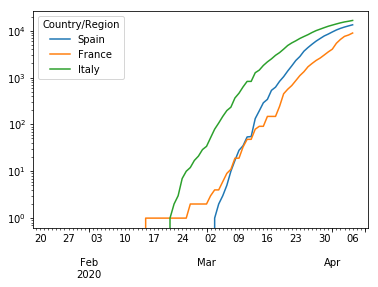

In [385]:
# Curva de fallecidos en España, Francia e Italia
# Escala logarítimica en eje y
global_deaths['Country'][['Spain','France', 'Italy']].plot(logy=True)

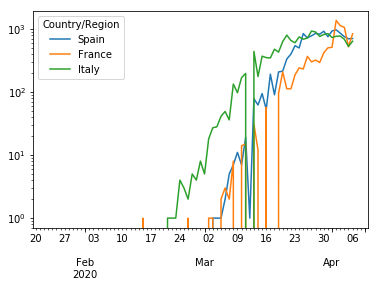

In [386]:
# Pero como lo importa es la velocidad, se pueden representar los datos como incrementos/diarios de fallecidos
global_deaths['Country'][['Spain','France', 'Italy']].diff(periods=1).plot(logy=True)

In [416]:
global_confirmed['Country','EU'] = global_confirmed['Country'][['Spain','France','Germany','Portugal',
                                                                'Austria','Belgium','Italy','Bulgaria','Croatia',
                                                               'Cyprus','Denmark','Estonia','Finland',
                                                               'Greece','Hungary','Ireland','Latvia',
                                                               'Lithuania','Luxembourg','Malta','Netherlands',
                                                               'Poland','Romania','Slovakia','Slovenia',
                                                               'Sweden','Czechia']].sum(axis=1)
global_deaths['Country','EU'] = global_deaths['Country'][['Spain','France','Germany','Portugal',
                                                                'Austria','Belgium','Italy','Bulgaria','Croatia',
                                                               'Cyprus','Denmark','Estonia','Finland',
                                                               'Greece','Hungary','Ireland','Latvia',
                                                               'Lithuania','Luxembourg','Malta','Netherlands',
                                                               'Poland','Romania','Slovakia','Slovenia',
                                                               'Sweden','Czechia']].sum(axis=1)


Se pueden crear nuevas series sumando las de otros paises. Por ejemplo, obtener los valores de la EU (TBC). También se puede usar la función sum() de un dataframe

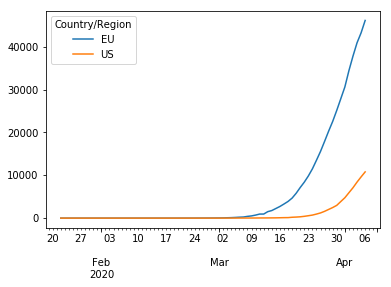

In [418]:
global_deaths['Country'][['EU','US']].plot(logy=False)